In [7]:
import pandas as pd
df = pd.read_csv('../AirIndia_Analysis/Updated.csv')
df.head()


,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,"2,307"
1,Air India,AI 607,Mumbai,16:40,Bengaluru,18:25,01 h 45 m,"3,578"
2,Air India,AI 641,Mumbai,18:55,Bengaluru,20:25,01 h 30 m,"5,783"
3,Air India,AI 603,Mumbai,06:45,Bengaluru,08:40,01 h 55 m,"9,458"
4,Air India,AI 639,Mumbai,09:20,Bengaluru,11:10,01 h 50 m,"17,018"


In [8]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FlightName     77 non-null     object
 1   FlightCode     77 non-null     object
 2   DepartingCity  77 non-null     object
 3   DepartingTime  77 non-null     object
 4   ArrivingCity   77 non-null     object
 5   ArrivingTime   77 non-null     object
 6   Duration       77 non-null     object
 7   Price          77 non-null     object
dtypes: object(8)
memory usage: 4.9+ KB


Index(['FlightName', 'FlightCode', 'DepartingCity', 'DepartingTime',
       'ArrivingCity', 'ArrivingTime', 'Duration', 'Price'],
      dtype='object')

In [9]:
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100

print("Null Counts:\n", null_counts)
print("\nNull Percentage:\n", null_percentage)

df = df.loc[:, null_percentage < 30]

df = df.dropna(thresh=len(df.columns) - 2)

df = df.dropna()


Null Counts:
 FlightName       0
FlightCode       0
DepartingCity    0
DepartingTime    0
ArrivingCity     0
ArrivingTime     0
Duration         0
Price            0
dtype: int64

Null Percentage:
 FlightName       0.0
FlightCode       0.0
DepartingCity    0.0
DepartingTime    0.0
ArrivingCity     0.0
ArrivingTime     0.0
Duration         0.0
Price            0.0
dtype: float64


In [10]:
df['Price'] = df['Price'].astype(str)

df['Price'] = df['Price'].str.replace(',', '', regex=True)

In [11]:
df['Price']

0      2307
1      3578
2      5783
3      9458
4     17018
      ...  
72     5472
73     5472
74     5472
75     5472
76     5472
Name: Price, Length: 77, dtype: object

In [12]:
print(df['Price'].dtype)


object


In [13]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [14]:
print(df['Price'].dtype)

int64


In [15]:
df['Price']

0      2307
1      3578
2      5783
3      9458
4     17018
      ...  
72     5472
73     5472
74     5472
75     5472
76     5472
Name: Price, Length: 77, dtype: int64

In [16]:
df = df.sort_values(by='Price', ascending=True)

In [17]:
df

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,2307
1,Air India,AI 607,Mumbai,16:40,Bengaluru,18:25,01 h 45 m,3578
5,Air India,AI 604,Bengaluru,09:20,Mumbai,11:35,02 h 15 m,4621
6,Air India,AI 604,Bengaluru,09:20,Mumbai,11:35,02 h 15 m,4621
42,Air India,AI 864,Mumbai,07:00,New Delhi,09:15,02 h 15 m,4745
...,...,...,...,...,...,...,...,...
22,Air India,AI 506,New Delhi,09:40,Bengaluru,12:30,02 h 50 m,8233
3,Air India,AI 603,Mumbai,06:45,Bengaluru,08:40,01 h 55 m,9458
32,Air India,AI 808,Bengaluru,21:00,New Delhi,23:55,02 h 55 m,10711
4,Air India,AI 639,Mumbai,09:20,Bengaluru,11:10,01 h 50 m,17018


In [18]:
df.to_csv("airindia_cleaned.csv", index=False)

In [19]:
df['Dep_Time'] = pd.to_datetime(df['DepartingTime'], errors='coerce')

df['Year'] = df['Dep_Time'].dt.year
df['Month'] = df['Dep_Time'].dt.month

print(df[['DepartingTime', 'Year', 'Month']].head())


   DepartingTime  Year  Month
0          03:55  2025      4
1          16:40  2025      4
5          09:20  2025      4
6          09:20  2025      4
42         07:00  2025      4


C:\Users\amogh\AppData\Local\Temp\ipykernel_9488\2476565692.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['DepartingTime'], errors='coerce')


In [20]:
df

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price,Dep_Time,Year,Month
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,2307,2025-04-16 03:55:00,2025,4
1,Air India,AI 607,Mumbai,16:40,Bengaluru,18:25,01 h 45 m,3578,2025-04-16 16:40:00,2025,4
5,Air India,AI 604,Bengaluru,09:20,Mumbai,11:35,02 h 15 m,4621,2025-04-16 09:20:00,2025,4
6,Air India,AI 604,Bengaluru,09:20,Mumbai,11:35,02 h 15 m,4621,2025-04-16 09:20:00,2025,4
42,Air India,AI 864,Mumbai,07:00,New Delhi,09:15,02 h 15 m,4745,2025-04-16 07:00:00,2025,4
...,...,...,...,...,...,...,...,...,...,...,...
22,Air India,AI 506,New Delhi,09:40,Bengaluru,12:30,02 h 50 m,8233,2025-04-16 09:40:00,2025,4
3,Air India,AI 603,Mumbai,06:45,Bengaluru,08:40,01 h 55 m,9458,2025-04-16 06:45:00,2025,4
32,Air India,AI 808,Bengaluru,21:00,New Delhi,23:55,02 h 55 m,10711,2025-04-16 21:00:00,2025,4
4,Air India,AI 639,Mumbai,09:20,Bengaluru,11:10,01 h 50 m,17018,2025-04-16 09:20:00,2025,4


In [21]:
duplicate_count = df.duplicated(subset=['FlightCode']).sum()
print("Number of duplicate FlightCode rows:", duplicate_count)

duplicates = df[df.duplicated(subset=['FlightCode'], keep=False)]
print(duplicates)


Number of duplicate FlightCode rows: 15
   FlightName FlightCode DepartingCity DepartingTime ArrivingCity  \
5   Air India     AI 604     Bengaluru         09:20       Mumbai   
6   Air India     AI 604     Bengaluru         09:20       Mumbai   
42  Air India     AI 864        Mumbai         07:00    New Delhi   
43  Air India     AI 864        Mumbai         07:00    New Delhi   
44  Air India     AI 864        Mumbai         07:00    New Delhi   
47  Air India     AI 623        Mumbai         10:25    New Delhi   
48  Air India     AI 623        Mumbai         10:25    New Delhi   
64  Air India     AI 560     New Delhi         07:10    Hyderabad   
65  Air India     AI 560     New Delhi         07:10    Hyderabad   
66  Air India     AI 560     New Delhi         07:10    Hyderabad   
40  Air India     AI 814     New Delhi         22:30       Mumbai   
39  Air India     AI 814     New Delhi         22:30       Mumbai   
13  Air India     AI 803     New Delhi         06:10    Bengalu

In [22]:
df.drop_duplicates(subset=['FlightCode'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [23]:
df

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price,Dep_Time,Year,Month
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,2307,2025-04-16 03:55:00,2025,4
1,Air India,AI 607,Mumbai,16:40,Bengaluru,18:25,01 h 45 m,3578,2025-04-16 16:40:00,2025,4
2,Air India,AI 604,Bengaluru,09:20,Mumbai,11:35,02 h 15 m,4621,2025-04-16 09:20:00,2025,4
3,Air India,AI 864,Mumbai,07:00,New Delhi,09:15,02 h 15 m,4745,2025-04-16 07:00:00,2025,4
4,Air India,AI 866,Mumbai,09:00,New Delhi,11:20,02 h 20 m,4745,2025-04-16 09:00:00,2025,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Air India,AI 506,New Delhi,09:40,Bengaluru,12:30,02 h 50 m,8233,2025-04-16 09:40:00,2025,4
58,Air India,AI 603,Mumbai,06:45,Bengaluru,08:40,01 h 55 m,9458,2025-04-16 06:45:00,2025,4
59,Air India,AI 808,Bengaluru,21:00,New Delhi,23:55,02 h 55 m,10711,2025-04-16 21:00:00,2025,4
60,Air India,AI 639,Mumbai,09:20,Bengaluru,11:10,01 h 50 m,17018,2025-04-16 09:20:00,2025,4


In [25]:
df.to_csv("../AirIndia_Analysis/airindia_cleaned.csv", index=False)

In [26]:
df

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price,Dep_Time,Year,Month
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,2307,2025-04-16 03:55:00,2025,4
1,Air India,AI 607,Mumbai,16:40,Bengaluru,18:25,01 h 45 m,3578,2025-04-16 16:40:00,2025,4
2,Air India,AI 604,Bengaluru,09:20,Mumbai,11:35,02 h 15 m,4621,2025-04-16 09:20:00,2025,4
3,Air India,AI 864,Mumbai,07:00,New Delhi,09:15,02 h 15 m,4745,2025-04-16 07:00:00,2025,4
4,Air India,AI 866,Mumbai,09:00,New Delhi,11:20,02 h 20 m,4745,2025-04-16 09:00:00,2025,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Air India,AI 506,New Delhi,09:40,Bengaluru,12:30,02 h 50 m,8233,2025-04-16 09:40:00,2025,4
58,Air India,AI 603,Mumbai,06:45,Bengaluru,08:40,01 h 55 m,9458,2025-04-16 06:45:00,2025,4
59,Air India,AI 808,Bengaluru,21:00,New Delhi,23:55,02 h 55 m,10711,2025-04-16 21:00:00,2025,4
60,Air India,AI 639,Mumbai,09:20,Bengaluru,11:10,01 h 50 m,17018,2025-04-16 09:20:00,2025,4


C:\Users\amogh\AppData\Local\Temp\ipykernel_9488\3017008856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x='Count', y=top_routes['DepartingCity'] + " → " + top_routes['ArrivingCity'], palette='Blues_r')


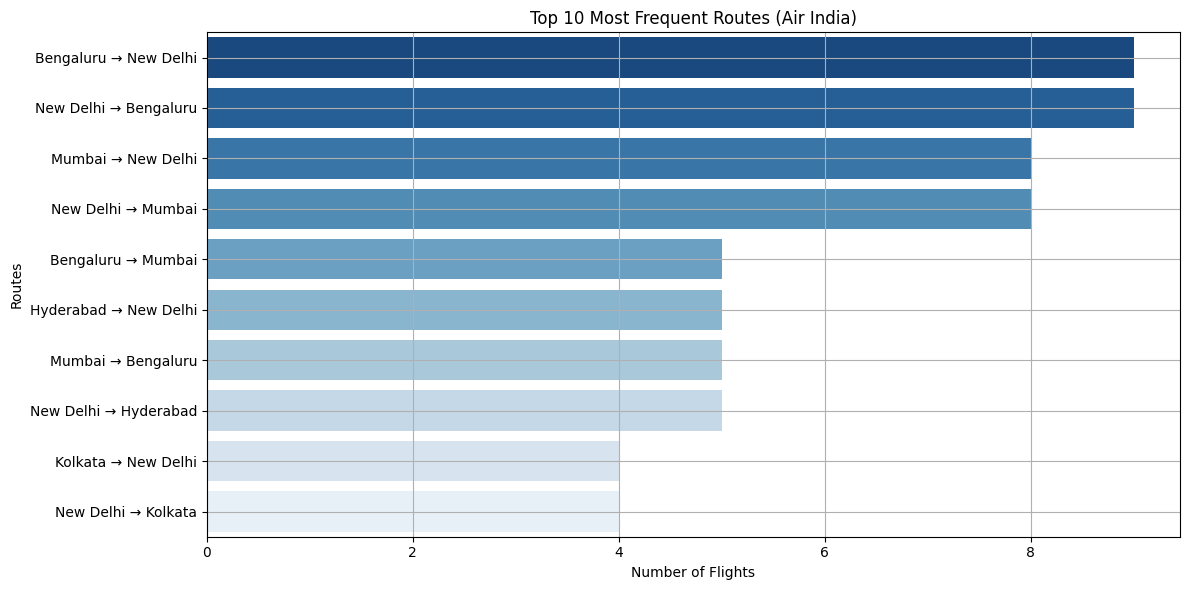

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

route_counts = df.groupby(['DepartingCity', 'ArrivingCity']).size().reset_index(name='Count')
top_routes = route_counts.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_routes, x='Count', y=top_routes['DepartingCity'] + " → " + top_routes['ArrivingCity'], palette='Blues_r')
plt.title('Top 10 Most Frequent Routes (Air India)')
plt.xlabel('Number of Flights')
plt.ylabel('Routes')
plt.grid(True)
plt.tight_layout()
plt.show()


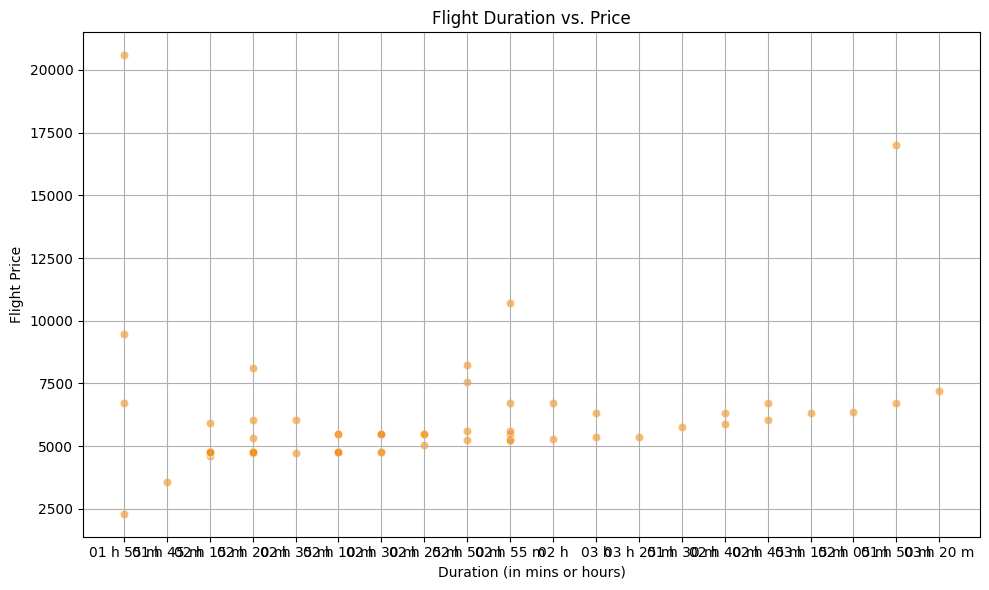

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duration', y='Price', alpha=0.6, color='darkorange')
plt.title('Flight Duration vs. Price')
plt.xlabel('Duration (in mins or hours)')
plt.ylabel('Flight Price')
plt.grid(True)
plt.tight_layout()
plt.show()

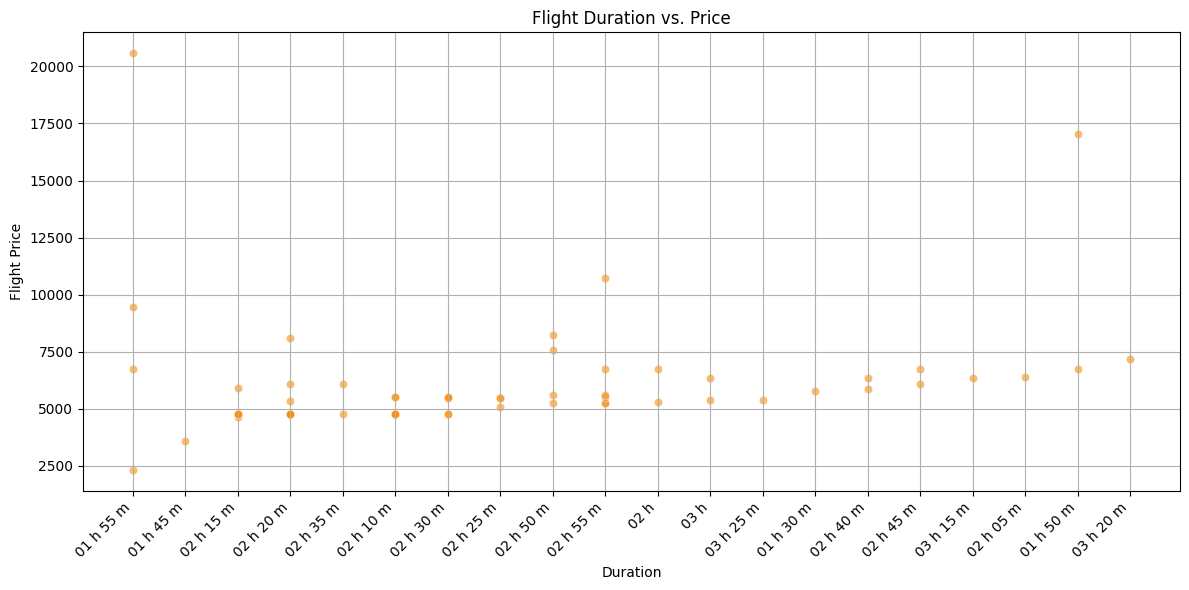

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Duration', y='Price', alpha=0.6, color='darkorange')
plt.title('Flight Duration vs. Price')
plt.xlabel('Duration')
plt.ylabel('Flight Price')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

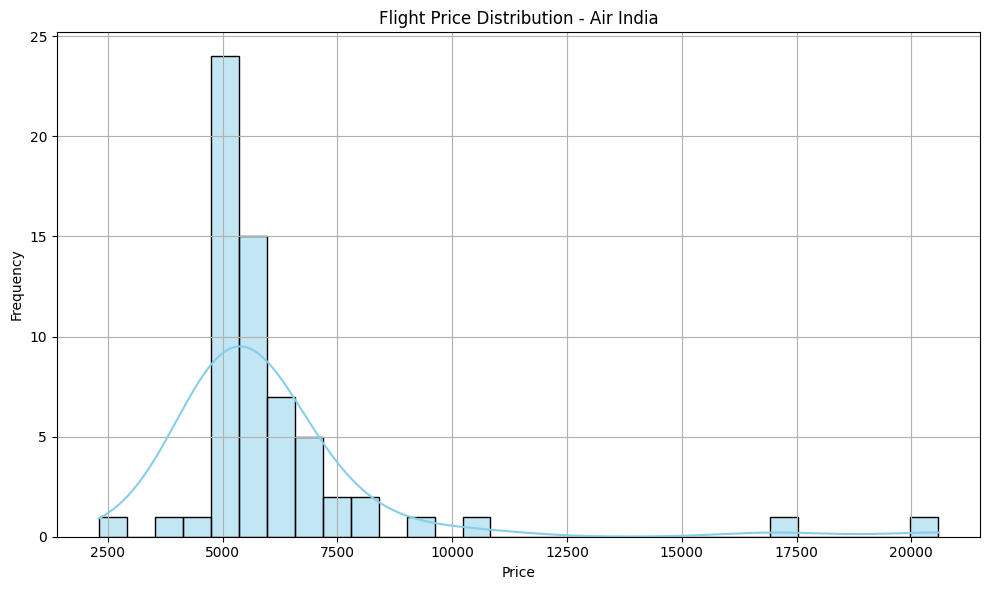

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Flight Price Distribution - Air India')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
df

,FlightName,FlightCode,DepartingCity,DepartingTime,ArrivingCity,ArrivingTime,Duration,Price,Dep_Time,Year,Month
0,Air India,AI 621,Mumbai,03:55,Bengaluru,05:50,01 h 55 m,2307,2025-04-16 03:55:00,2025,4
1,Air India,AI 607,Mumbai,16:40,Bengaluru,18:25,01 h 45 m,3578,2025-04-16 16:40:00,2025,4
2,Air India,AI 604,Bengaluru,09:20,Mumbai,11:35,02 h 15 m,4621,2025-04-16 09:20:00,2025,4
3,Air India,AI 864,Mumbai,07:00,New Delhi,09:15,02 h 15 m,4745,2025-04-16 07:00:00,2025,4
4,Air India,AI 866,Mumbai,09:00,New Delhi,11:20,02 h 20 m,4745,2025-04-16 09:00:00,2025,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Air India,AI 506,New Delhi,09:40,Bengaluru,12:30,02 h 50 m,8233,2025-04-16 09:40:00,2025,4
58,Air India,AI 603,Mumbai,06:45,Bengaluru,08:40,01 h 55 m,9458,2025-04-16 06:45:00,2025,4
59,Air India,AI 808,Bengaluru,21:00,New Delhi,23:55,02 h 55 m,10711,2025-04-16 21:00:00,2025,4
60,Air India,AI 639,Mumbai,09:20,Bengaluru,11:10,01 h 50 m,17018,2025-04-16 09:20:00,2025,4


In [34]:
df['Route'] = df['DepartingCity'] + ' → ' + df['ArrivingCity']

route_popularity = df['Route'].value_counts().to_dict()

df['Engagement_Score'] = df['Route'].map(route_popularity)


In [35]:
df['Engagement_Score']

0     5
1     5
2     5
3     8
4     8
     ..
57    9
58    5
59    9
60    5
61    5
Name: Engagement_Score, Length: 62, dtype: int64

C:\Users\amogh\AppData\Local\Temp\ipykernel_9488\1961782606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_engagement, x='Engagement_Score', y='Route', palette='viridis')


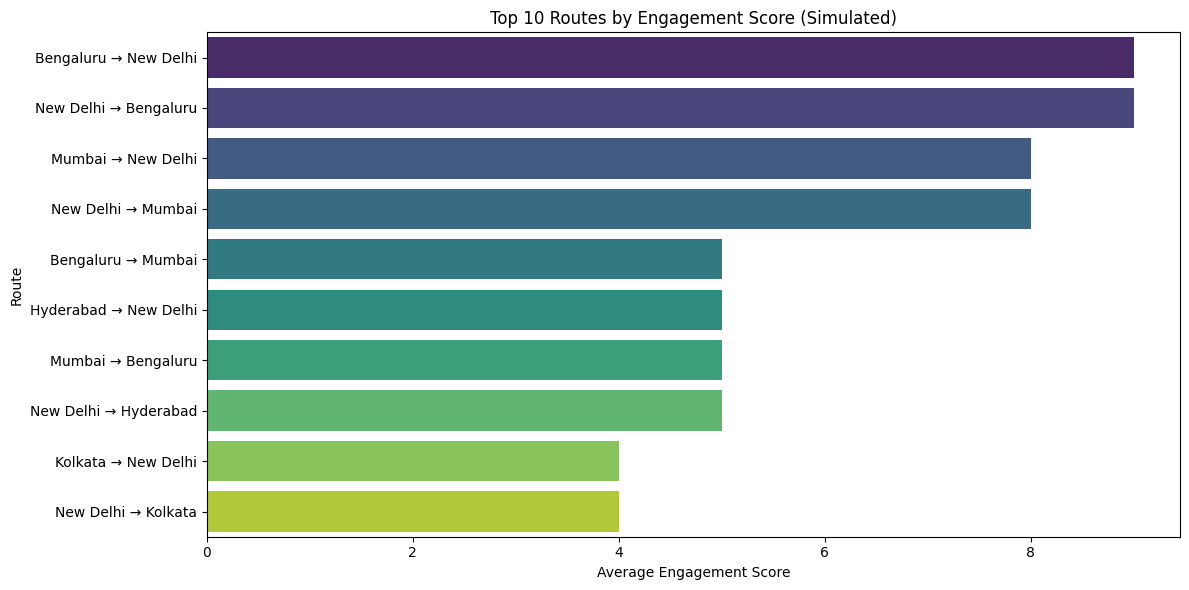

In [36]:
top_engagement = df.groupby('Route')['Engagement_Score'].mean().reset_index()
top_engagement = top_engagement.sort_values(by='Engagement_Score', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_engagement, x='Engagement_Score', y='Route', palette='viridis')
plt.title('Top 10 Routes by Engagement Score (Simulated)')
plt.xlabel('Average Engagement Score')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

C:\Users\amogh\AppData\Local\Temp\ipykernel_9488\2438509347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DepartingCity', order=df['DepartingCity'].value_counts().index, palette='Set2')


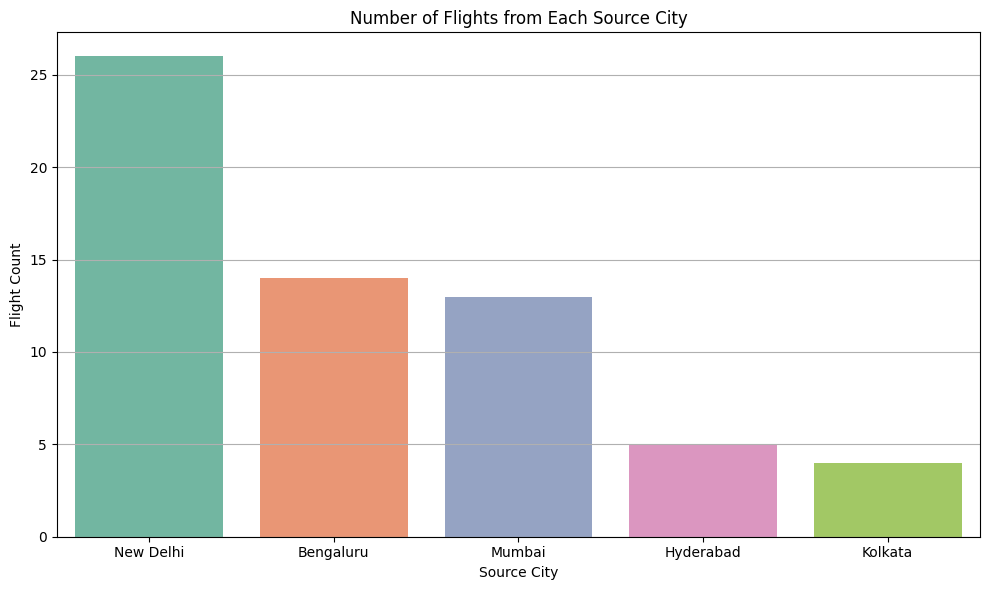

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='DepartingCity', order=df['DepartingCity'].value_counts().index, palette='Set2')
plt.title('Number of Flights from Each Source City')
plt.xlabel('Source City')
plt.ylabel('Flight Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


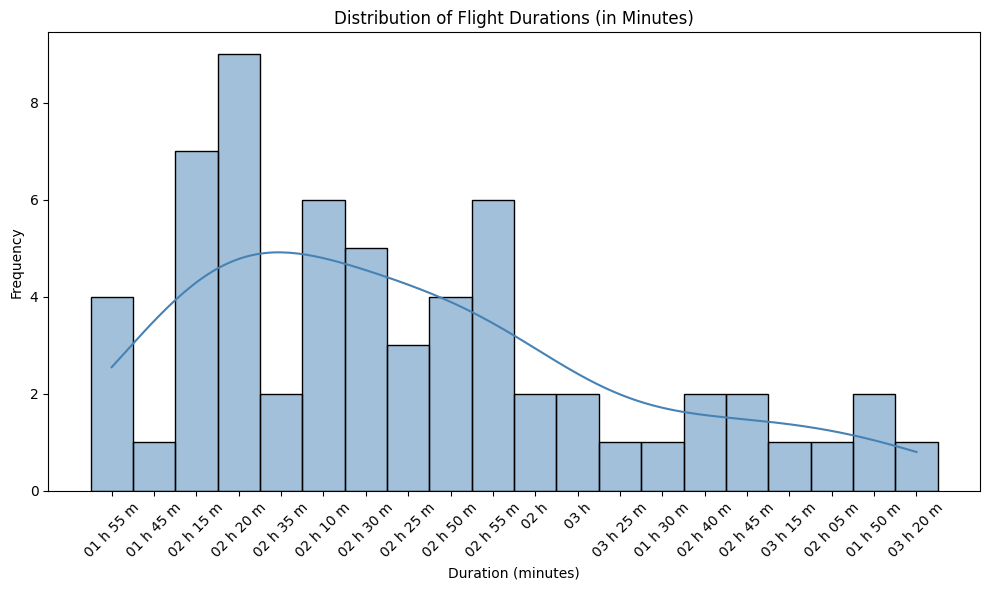

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Duration'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Flight Durations (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

C:\Users\amogh\AppData\Local\Temp\ipykernel_9488\2005828086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_costly_routes, x='Price', y='Route', palette='Reds_r')


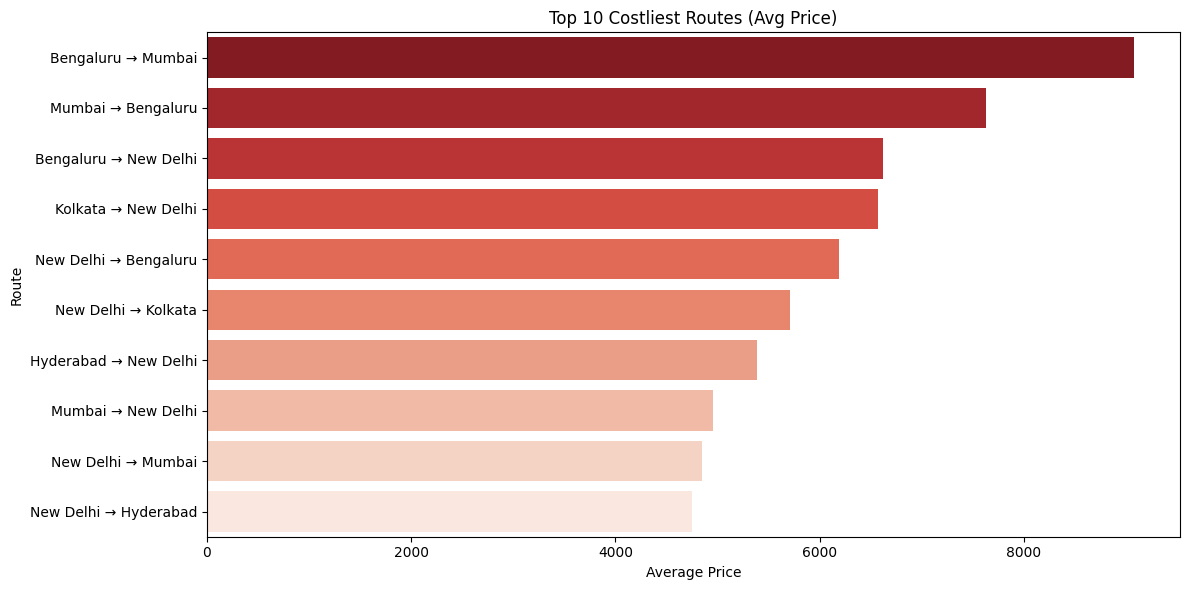

In [44]:
top_costly_routes = df.groupby('Route')['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_costly_routes, x='Price', y='Route', palette='Reds_r')
plt.title('Top 10 Costliest Routes (Avg Price)')
plt.xlabel('Average Price')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

Focus on Affordable Pricing

Optimize Flight Duration

Promote High-Engagement Routes

Improve Customer Experience

Highlight Popular Source & Destination Pairs